In [1]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/fa

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
(x_train , y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [6]:
len(x_train)

60000

In [8]:
len(x_test)

10000

In [9]:
x_train[0].shape

(28, 28)

In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

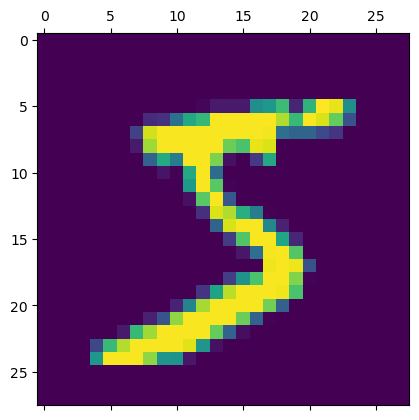

In [12]:
plt.matshow(x_train[0])

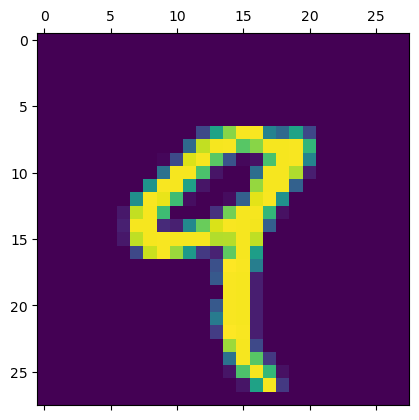

In [13]:
plt.matshow(x_train[4])

In [14]:
y_train[5]

2

In [16]:
y_train[0:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

In [17]:
x_train.shape

(60000, 28, 28)

In [18]:
x_train_flatten=x_train.reshape(len(x_train),28*28)

In [19]:
x_train_flatten.shape

(60000, 784)

In [20]:
x_test_flatten=x_test.reshape(len(x_test),28*28)
x_test_flatten.shape


(10000, 784)

## Without scaling

In [25]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [28]:
from tensorflow.compat.v1 import keras
from tensorflow.compat.v1.keras import layers
from tensorflow.compat.v1.keras.layers import Dense


model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])

model.compile(
     optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.7775 - accuracy: 0.8395
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.1315 - accuracy: 0.8773
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.7073 - accuracy: 0.8836
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.5570 - accuracy: 0.8847
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4022 - accuracy: 0.8873


## With Scaling

In [29]:
x_train= x_train/255
x_test=x_test/255

In [30]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)

In [31]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])

model.compile(
     optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4657 - accuracy: 0.8779
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3035 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9250


In [32]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2671 - accuracy: 0.9258


[0.2670552730560303, 0.9258000254631042]

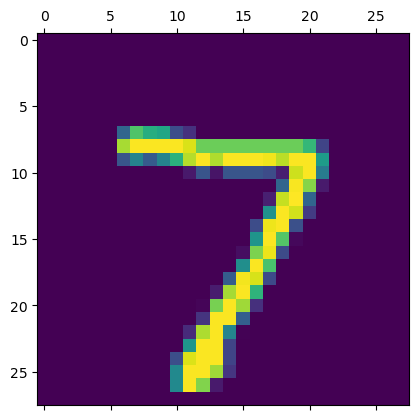

In [33]:
plt.matshow(x_test[0])

In [36]:
y_predicted=model.predict(x_test_flatten)

313/313 [==============================] - 0s 1ms/step


In [37]:
y_predicted[0]

array([2.3393430e-02, 4.7622271e-07, 8.1039704e-02, 9.6061283e-01,
       2.6831529e-03, 1.7183180e-01, 1.8277530e-06, 9.9983287e-01,
       1.3396563e-01, 7.1702749e-01], dtype=float32)

In [38]:
np.argmax(y_predicted[0])

7

In [39]:
np.argmax(y_predicted[2])

1

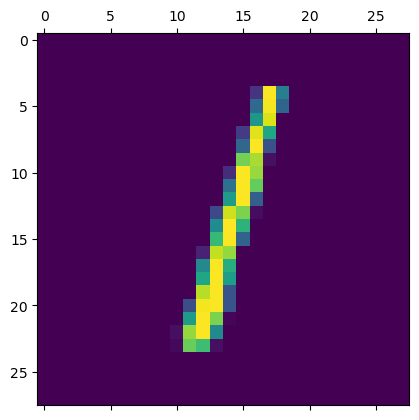

In [40]:
plt.matshow(x_test[2])

In [44]:
np.argmax(y_predicted[7])

9

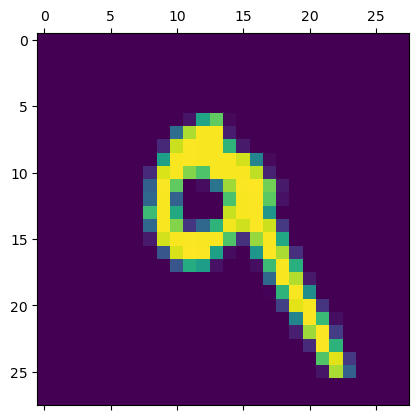

In [45]:
plt.matshow(x_test[7])

In [46]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [47]:
y_predicted_labels= [np.argmax(i) for i in y_predicted]
y_predicted_labels[0:5]

[7, 2, 1, 0, 4]

In [48]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    5,    7,    2,    2,    0],
       [   0, 1110,    4,    1,    0,    1,    4,    2,   13,    0],
       [   3,    9,  933,    8,    6,    7,   12,   10,   40,    4],
       [   3,    0,   27,  888,    0,   46,    2,   12,   26,    6],
       [   1,    1,    7,    0,  911,    0,    9,    4,   13,   36],
       [   7,    2,    3,   18,    8,  800,   13,    4,   30,    7],
       [   9,    3,    8,    0,    8,   17,  907,    2,    4,    0],
       [   1,    5,   24,    2,    5,    0,    0,  953,    6,   32],
       [   4,    6,    6,   14,    9,   32,    9,   11,  878,    5],
       [   9,    7,    2,    8,   23,    7,    0,   24,   11,  918]])>

Text(95.72222222222221, 0.5, 'Truth')

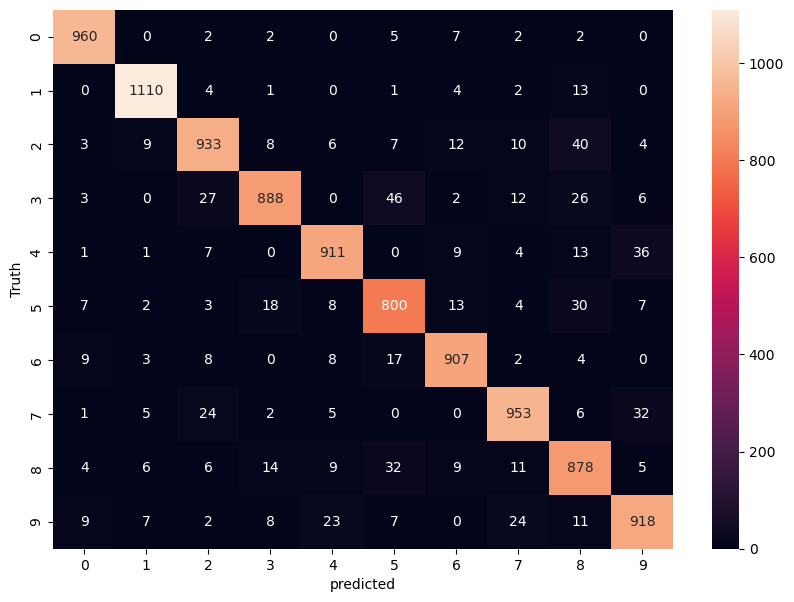

In [49]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("Truth")

## multiple hiden layers

In [51]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")

])

model.compile(
     optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2786 - accuracy: 0.9213
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1296 - accuracy: 0.9618
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0887 - accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0677 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0537 - accuracy: 0.9836


In [52]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0814 - accuracy: 0.9749


[0.08142796903848648, 0.9749000072479248]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

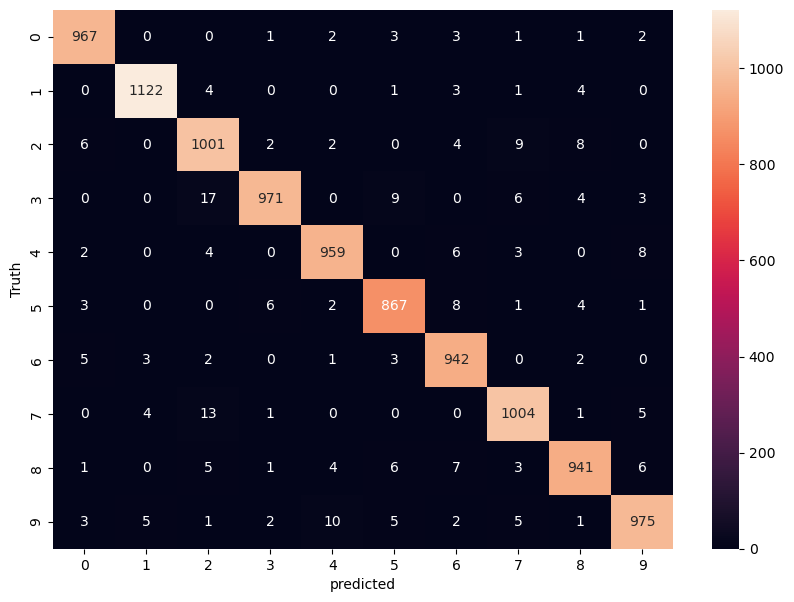

In [55]:
y_predicted=model.predict(x_test_flatten)
y_predicted_labels= [np.argmax(i) for i in y_predicted]


cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("Truth")

### Without using flatten layer  to model.fit so we dont reshape on input dataset

In [63]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")

])

model.compile(
     optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2767 - accuracy: 0.9202
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1292 - accuracy: 0.9619
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0900 - accuracy: 0.9727
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0676 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0532 - accuracy: 0.9832


In [65]:
weights = model.get_weights()
coef = weights[0]  # Weights
intercept = weights[1]  # Biases/Intercepts


In [66]:
coef

array([[ 0.05749331,  0.06708127, -0.04583209, ...,  0.06678388,
         0.0362547 ,  0.0147094 ],
       [-0.040124  ,  0.02063839,  0.04805547, ..., -0.03307821,
         0.03860068, -0.06412226],
       [-0.07876868, -0.05237087,  0.01499863, ..., -0.04215119,
        -0.02622889, -0.01289371],
       ...,
       [-0.07922026,  0.00399546, -0.07421625, ...,  0.06719096,
        -0.05686076, -0.04963802],
       [-0.02337448, -0.04360771, -0.07002467, ...,  0.06270722,
         0.07214677, -0.01651414],
       [ 0.03386238, -0.02700426, -0.02408559, ..., -0.07679036,
         0.00892572, -0.01892451]], dtype=float32)